Jakub Szypuła

# Analiza zbioru German Credit Data Dataset

Czyli czy ludzie zostali "podpisani" poprawnie.


## Ogólna analiza ramki danych
Zbiór "German Credit Data Dataset" przedstawia dane na temat niemieckich kredytobiorców, z 20 kolumnami informacji na ich temat oraz kolumną z oceną ich zdolności kredydowej. Załadowanie danych i potrzebnych pakietów zostanie przedstawione poniżej.

In [12]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
dane = pd.read_csv('german_credit_data_dataset.csv')

In [15]:
braki=dane.isnull().mean() 
braki

checking_account_status    0.0
duration                   0.0
credit_history             0.0
purpose                    0.0
credit_amount              0.0
savings                    0.0
present_employment         0.0
installment_rate           0.0
personal                   0.0
other_debtors              0.0
present_residence          0.0
property                   0.0
age                        0.0
other_installment_plans    0.0
housing                    0.0
existing_credits           0.0
job                        0.0
dependents                 0.0
telephone                  0.0
foreign_worker             0.0
customer_type              0.0
dtype: float64

Dużą zaletą tego zbioru danych jest brak wartości NA, bądź None. Wszak jest to zbiór niemiecki. Równo 21000 wartości na 21 kolumn i 1000 wierszy.

In [17]:
dane.size

21000

W poniższej komórce pozamieniam w kolumnach stringi, żeby móc wygodniej odczytywać dane.

In [35]:
dane["purpose"] = dane["purpose"].replace("A40", "nowy_samochod")
dane["purpose"] = dane["purpose"].replace("A41", "uzywany_samochod")
dane["purpose"] = dane["purpose"].replace("A42", "meble/ekwipunek")
dane["purpose"] = dane["purpose"].replace("A43", "radio/telewizja")
dane["purpose"] = dane["purpose"].replace("A44", "domowe")
dane["purpose"] = dane["purpose"].replace("A45", "naprawy")
dane["purpose"] = dane["purpose"].replace("A46", "edukacja")
dane["purpose"] = dane["purpose"].replace("A47", "wakacje")
dane["purpose"] = dane["purpose"].replace("A48", "przeszkolenie")
dane["purpose"] = dane["purpose"].replace("A49", "biznes")
dane["purpose"] = dane["purpose"].replace("A410", "inne")

dane["present_employment"] = dane["present_employment"].replace("A71", "bezrobotny")
dane["present_employment"] = dane["present_employment"].replace("A72", "ponizej_rok")
dane["present_employment"] = dane["present_employment"].replace("A73", "rok_a_4lata")
dane["present_employment"] = dane["present_employment"].replace("A74", "4lata_a_7")
dane["present_employment"] = dane["present_employment"].replace("A75", "ponad_7")


dane["personal"] = dane["personal"].replace("A91", "rozwiedziony")
dane["personal"] = dane["personal"].replace("A92", "rozwiedziona/mezatka") # wow
dane["personal"] = dane["personal"].replace("A93", "singiel")
dane["personal"] = dane["personal"].replace("A94", "zonaty/wdowiec")
dane["personal"] = dane["personal"].replace("A95", "singielka")


dane["other_debtors"] = dane["other_debtors"].replace("A101", "nikt")
dane["other_debtors"] = dane["other_debtors"].replace("A102", "co-applicant")
dane["other_debtors"] = dane["other_debtors"].replace("A103", "guarantor")

dane["other_installment_plans"] = dane["other_installment_plans"].replace("A141", "bank")
dane["other_installment_plans"] = dane["other_installment_plans"].replace("A142", "sklepy")
dane["other_installment_plans"] = dane["other_installment_plans"].replace("A143", "nikt")


dane["housing"] = dane["housing"].replace("A151", "wynajem")
dane["housing"] = dane["housing"].replace("A152", "na_wlasnosc")
dane["housing"] = dane["housing"].replace("A153", "za_darmo")


dane["job"] = dane["job"].replace("A171", "unemployed/ unskilled - non-resident")
dane["job"] = dane["job"].replace("A172", "unskilled - resident")
dane["job"] = dane["job"].replace("A173", "skilled employee / official")
dane["job"] = dane["job"].replace("A174", "management/ self-employed/highly qualified employee/ officer")


dane["telephone"] = dane["telephone"].replace("A191", False)
dane["telephone"] = dane["telephone"].replace("A192", True)


dane["foreign_worker"] = dane["foreign_worker"].replace("A201", True)
dane["foreign_worker"] = dane["foreign_worker"].replace("A202", False)

In [43]:
pd.options.display.max_columns = None
dane.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,present_residence,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,radio/telewizja,1169.0,A65,ponad_7,4.0,singiel,nikt,4.0,A121,67.0,nikt,na_wlasnosc,2.0,A173,1,True,True,1
1,A12,48,A32,radio/telewizja,5951.0,A61,rok_a_4lata,2.0,rozwiedziona/mezatka,nikt,2.0,A121,22.0,nikt,na_wlasnosc,1.0,A173,1,False,True,2
2,A14,12,A34,edukacja,2096.0,A61,4lata_a_7,2.0,singiel,nikt,3.0,A121,49.0,nikt,na_wlasnosc,1.0,A172,2,False,True,1
3,A11,42,A32,meble/ekwipunek,7882.0,A61,4lata_a_7,2.0,singiel,guarantor,4.0,A122,45.0,nikt,za_darmo,1.0,A173,2,False,True,1
4,A11,24,A33,nowy_samochod,4870.0,A61,rok_a_4lata,3.0,singiel,nikt,4.0,A124,53.0,nikt,za_darmo,2.0,A173,2,False,True,2


Powyższa operacja nie była potrzebna, ale ułatwia analizę - lepsze ponad_7 (lat) niż A74.

Proste podsumowanie danych ciągłych z ramki danych.

In [29]:
dane.describe()

,duration,credit_amount,installment_rate,present_residence,age,existing_credits,dependents,customer_type
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


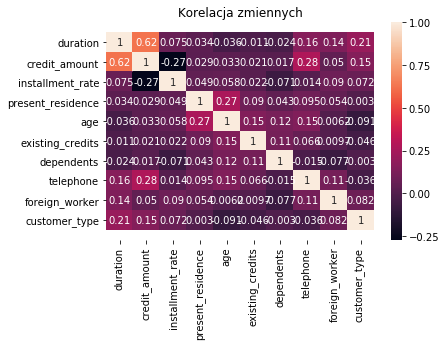

In [53]:
corr=dane.iloc[:,np.r_[0:21,9]].corr()
#plt.matshow(corr)
#plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
#plt.yticks(range(len(corr.columns)), corr.columns)
ax=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True)
# below is a workaround for matrix truncation
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Korelacja zmiennych')
plt.show()

Jak widać na powyższym wykresie, korelacja między różnymi kolumnami w danym zbiorze raczej jest słaba, poza zależnością między czasem trwania, a wielkością kredytu, która została przedstawiona poniżej.

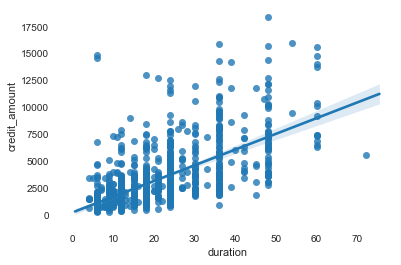

In [14]:
sns.regplot(x = "duration", y = "credit_amount",data=dane, fit_reg=True) 

Jak widać na powyższym wykresie, długość trwania kredytu rośnie wraz z jego wysokością. Nie jest to zbyt zaskakujące, dlatego skupię się na innej zmiennej.

# Pracownicy zagraniczni

W zbiorze danych pojawias się kolumna `foreign_worker`. Zamierzam się jej przjrzeć.

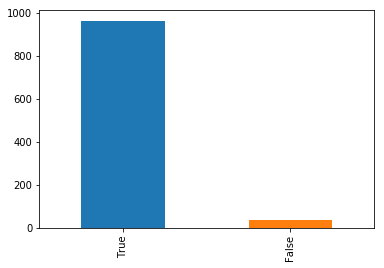

In [35]:
dane['foreign_worker'].value_counts().plot.bar()

In [208]:
print("Zagraniczni: ",zagraniczni_size," Miejscowi:", miejscowi_size)

Zagraniczni:  963.0  Miejscowi: 37.0


Określenie "German Banking Data" nie wydaje się teraz zbyt fortunne, ponieważ ogromna większość obserwacji w zmiennej "foreign_worker" jest prawdą, co implikowałoby, że są pracownikami z zagranicy. Chyba że oryginalny opis danych się mylił, co wydaje się być mało prawdopodobne, widząc z jaką skrupulatnością zostały zapisane te dane, o czym świadczy brak braków. Ale czy na pewno? Zamierzam to sprawdzić.

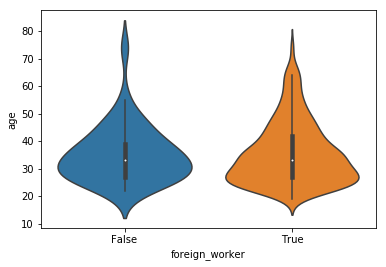

In [71]:
sns.violinplot(dane.foreign_worker, dane.age)

Patrząc na wykres skrzypcowy widać, że wiek osób, u których kolumna `foreign_worker` posiada wartość `False` jest przesunięty wyżej od tych, u których jest to `True`. Pasuje to ogólnej wizji zagranicznych pracowników, jako generalnie młodszych ludzi, którzy chcą zarobić więcej pieniędzy, niż mogliby w ojczystym kraju. Trudno jednak jednoznacznie ocenić, bo druga próbka jest mała.

Text(0,0.5,'Procenty')

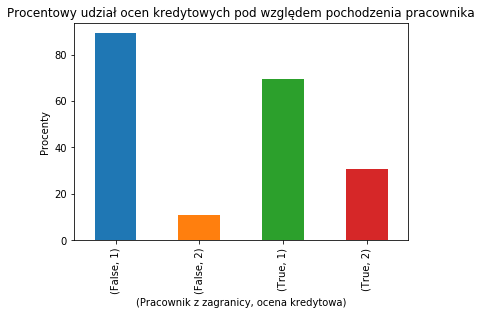

In [119]:
grupy = dane[['foreign_worker', 'customer_type', 'age']].groupby(['foreign_worker', 'customer_type']).count()
arr = dane[['foreign_worker', 'customer_type']].groupby(['foreign_worker']).count().iloc[:,0:1].values
arr =np.concatenate((arr, arr), axis=1).tolist()
rozmiary_grup = [item for sublist in arr for item in sublist]
(100*grupy["age"]/rozmiary_grup).plot.bar()
plt.title('Procentowy udział ocen kredytowych pod względem pochodzenia pracownika')
plt.xlabel('(Pracownik z zagranicy, ocena kredytowa)')
plt.ylabel('Procenty')

Wśród pracowników zagranicznych jest o wiele większy procent osób ze złą oceną kredytową (1 - dobra, 2 - zła), niż pośród drugiej grupy. Wydawałoby się to sensowne - pracownicy z innego kraju, którzy nie wychowali się w tym kraju i mogą wręcz pracować tylko sezonowo mogą mieć większy problem ze spłatą kredytów od native'ów.

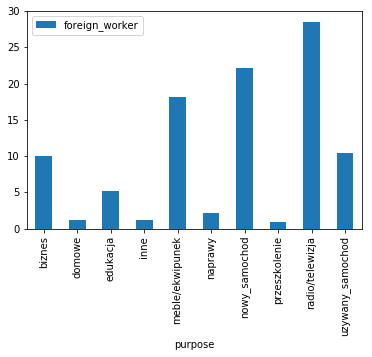

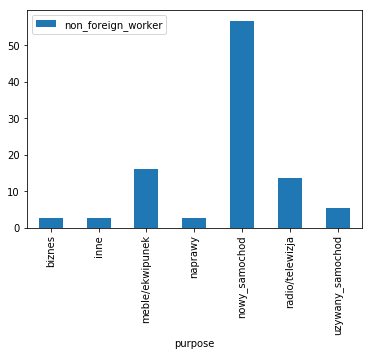

In [213]:
cel_zagraniczni = dane[["purpose", "foreign_worker"]].loc[dane['foreign_worker']==True]
zagraniczni_size = cel_zagraniczni.size/2
cel_zagraniczni = 100*cel_zagraniczni.groupby("purpose").count()/zagraniczni_size

cel_zagraniczni.plot.bar()


cel_miejscowi = dane[["purpose", "foreign_worker"]].loc[dane['foreign_worker']==False]
miejscowi_size = cel_miejscowi.size/2
cel_miejscowi = 100*cel_miejscowi.groupby("purpose").count()/miejscowi_size
cel_miejscowi = cel_miejscowi.rename(columns={"foreign_worker": "non_foreign_worker"})
cel_miejscowi.plot.bar()

Widać, że pracownicy zagraniczni znacznie częściej kupują używane samochody w porównaniu do nowych samochodów (około 23% do 10% oraz 55% do 3% dla osób, które nie są pracownikami z zagranicy). Obie grupy poświęcają podobny procent na meble i naprawy, pracownicy zagraniczni zaś znacznie częściej biorą pożyczki na biznes, edukację i przeszkolenie. Znacznie rzadziej zaś biorą kredyt na samochód

Text(0, 0.5, 'Procenty')

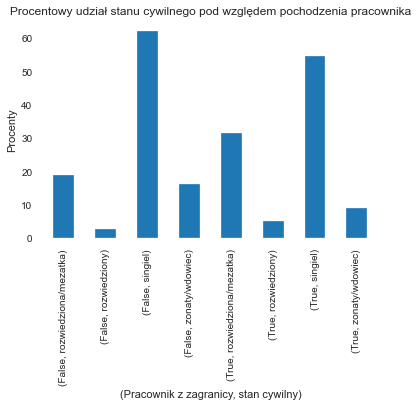

In [20]:
grupy = dane[['foreign_worker', 'personal', 'age']].groupby(['foreign_worker', 'personal']).count()
arr = dane[['foreign_worker', 'personal']].groupby(['foreign_worker']).count().iloc[:,0:1].values
arr =np.concatenate((arr, arr, arr, arr), axis=1).tolist()
rozmiary_grup = [item for sublist in arr for item in sublist]
(100*grupy["age"]/rozmiary_grup).plot.bar()
plt.title('Procentowy udział stanu cywilnego pod względem pochodzenia pracownika')
plt.xlabel('(Pracownik z zagranicy, stan cywilny)')
plt.ylabel('Procenty')

Rozkład jest bardzo zblżony, aczkolwiek wśród pracowników zagranicznych jest znacznie więcej rozwiedzionych/mężatek i mniej żonatych/wdowców (z jakiegoś powodu "rozwiedziona/mężatka" to osobna kategoria, tak samo jak "rozwiedziony", "wdowa" nie występuje w ogóle). Być może jest to powiązane z niższym wiekiem pośród pracowników zagranicznych, ponieważ mężczyźni żenią się zazwyczaj później, niż kobiety wychodzą za mąż.

Text(0, 0.5, 'Procenty')

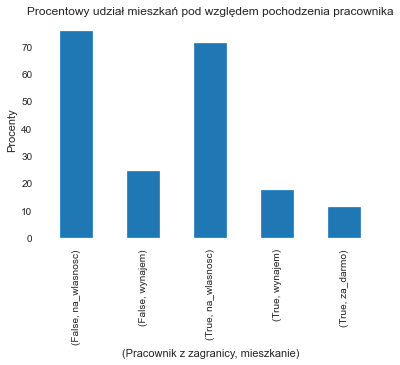

In [26]:
grupy = dane[['foreign_worker', 'housing', 'age']].groupby(['foreign_worker', 'housing']).count()
arr = dane[['foreign_worker', 'housing']].groupby(['foreign_worker']).count().iloc[:,0:1].values
arr =np.concatenate((arr, arr), axis=1).tolist()
rozmiary_grup = [item for sublist in arr for item in sublist]
rozmiary_grup.append(963)
(100*grupy["age"]/rozmiary_grup).plot.bar()
plt.title('Procentowy udział mieszkań pod względem pochodzenia pracownika')
plt.xlabel('(Pracownik z zagranicy, mieszkanie)')
plt.ylabel('Procenty')

Pracownicy z zagranicy mają znacznie pewien procent darmowych mieszkań, chociaż też znaczna większość posiada nieruchomość na własność.

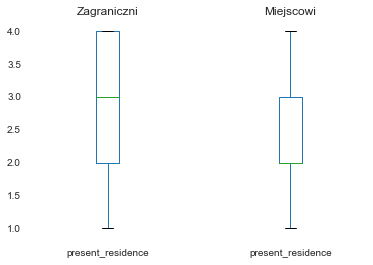

In [33]:
res_zagraniczni = dane[["present_residence", "foreign_worker"]].loc[dane['foreign_worker']==True]
res_miejscowi = dane[["present_residence", "foreign_worker"]].loc[dane['foreign_worker']==False]
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)
res_zagraniczni.plot.box(title="Zagraniczni",ax=ax)
res_miejscowi.plot.box(title="Miejscowi",ax=ax2)

Mimo tego, że oficjalnym opisem jest "present_residence	float	Present residence since", trudno jest określić czym jest w tym wypadku 1, 2, 3, czy 4. Wygląda jak nieprzetłumaczona kategoria. Można wnioskować, że im wyższy numer, tym krócej ktoś znajduje się w danym miejscu - dlatego wśród pracowników zagranicznych pudełko jest przesunięte wyżej, jego górna ściana jest na poziomie górnego wąsa drugiego boxplota.

Text(0, 0.5, 'Procenty')

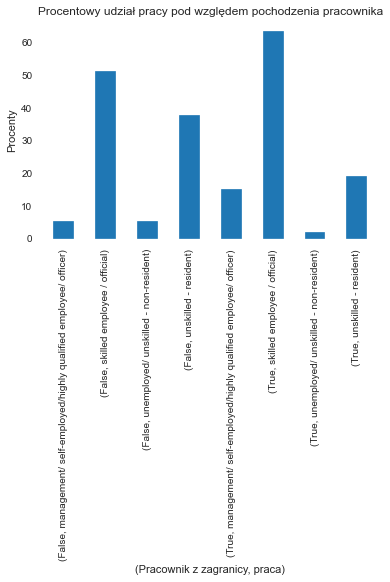

In [36]:
grupy = dane[['foreign_worker', 'job', 'age']].groupby(['foreign_worker', 'job']).count()
arr = dane[['foreign_worker', 'job']].groupby(['foreign_worker']).count().iloc[:,0:1].values
arr =np.concatenate((arr, arr, arr, arr), axis=1).tolist()
rozmiary_grup = [item for sublist in arr for item in sublist]
(100*grupy["age"]/rozmiary_grup).plot.bar()
plt.title('Procentowy udział pracy pod względem pochodzenia pracownika')
plt.xlabel('(Pracownik z zagranicy, praca)')
plt.ylabel('Procenty')

Podobnie jak wcześniej, dane są bardzo podobne - z tą różnicą, że wśród pracowników zagranicznych jest znacznie mniej bezrobotnych, bądź bezumiejętnych (ang. "unskilled").

Text(0, 0.5, 'Procenty')

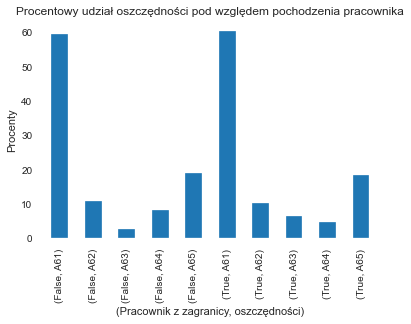

In [38]:
grupy = dane[['foreign_worker', 'savings', 'age']].groupby(['foreign_worker', 'savings']).count()
arr = dane[['foreign_worker', 'savings']].groupby(['foreign_worker']).count().iloc[:,0:1].values
arr =np.concatenate((arr, arr, arr, arr, arr), axis=1).tolist()
rozmiary_grup = [item for sublist in arr for item in sublist]
(100*grupy["age"]/rozmiary_grup).plot.bar()
plt.title('Procentowy udział oszczędności pod względem pochodzenia pracownika')
plt.xlabel('(Pracownik z zagranicy, oszczędności)')
plt.ylabel('Procenty')

Im wyższa kategoria - tym wyższe oszczędności. Jak wcześniej, sytuacja jest bardzo podobna, chociaż "miejscowi" mają nieznacznie więcej osób w dwóch najbogatszych kategoriach.

### Werdykt

Po analizie tych zbiorów jestem gotów stwierdzić, że zostały one podpisane poprawnie. Dane pasują do pewnego "ogólnego" wyobrażenia na temat pracowników zagranicznych w Niemczech, szczególnie takich, którzy biorą kredyty. Porównanie także z "miejscowymi" wydaje się mieć sens. Oczywiście, pozory mylą i być może dane podpisane są niepoprawnie, a różnice leżą tak naprawdę w domenie błędu statystycznego, zostały źle zinterpretowane, bądź po prostu są bez znaczenia, ze względu na małą próbkę "miejscowych", których było ledwie 37.

# Raport wygenerowany automatycznie

Zamiast robienia tej analizy ręcznie, mogłem posłużyć się narzędziem do automatycznego tworzenia raportów. Ale czy byłoby to równie dobre?

In [7]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dane, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_file(output_file="PD1raportautomatyczny.html")

In [9]:
profile

### Zalety narzędzia
* prostota w użyciu - jedna linijka kodu
* szybkość - napisanie takiego raportu ręcznie zajęłoby bardzo długo
* rozbudowane statystyki - o wiele łatwiej można zorientować się w zależnościach między danymi
* kilka macierzy różnych rodzajów korelacji

### Ograniczenia narzędzia
* brak zależności między zmiennymi dyskretnymi i ciągłymi - wykresy takie jak boxploty w zależności od kategorii `foreign_worker` dalej trzeba generować ręcznie
* dalej dane są dosyć ogólne - nie ma np. linii trendu, a dodanie jej nie jest takie proste jak w przypadku robienia tego samego wykresu ręcznie
* sztywno narzucona struktura
* dane dalej trzeba interpretować - raport jest w stanie wskazać które zmienne są powiązane ze sobą, jednak nie jest oczywiście w stanie pokazać dlaczego
* brak podsumowania zmiennych numerycznych, tak jak podsumowane są zmienne kategoryczne, chociaż w tym miejscu można użyć np. zwykłego boxplota